# Bank Loan Default Prediction

 This notebook demonstrates the process of building and evaluating machine learning models to predict bank loan defaults.

# 1. Importing Libraries

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier-
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE

These libraries provide tools for data manipulation, machine learning model creation, evaluation, and handling imbalanced datasets.

# 2. Loading and Preprocessing Data

In [64]:
file_path = r'C:\Users\Harshan\Documents\dfa\bankloans.csv'
data = pd.read_csv(file_path)
data['default'] = data['default'].apply(lambda x: 1 if x > 0.5 else 0)
data_cleaned = data.dropna(subset=['default'])

This section loads the data from a CSV file and preprocesses it:

The 'default' column is converted to binary (0 or 1).
Rows with missing values in the 'default' column are removed.

# 3. Splitting Features and Target

In [69]:
X = data_cleaned.drop('default', axis=1)
y = data_cleaned['default']

The features (X) and target variable (y) are separated.

# 4. Train-Test Split and Scaling

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The data is split into training and testing sets, then scaled to standardize the features.

# 5. Handling Imbalanced Data

In [77]:
smote = SMOTE()
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

SMOTE (Synthetic Minority Over-sampling Technique) is used to balance the dataset by creating synthetic samples of the minority class



# 6. Training and Evaluating Logistic Regression

In [81]:
log_reg = LogisticRegression()
log_reg.fit(X_train_bal, y_train_bal)
y_pred_log = log_reg.predict(X_test_scaled)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression AUC-ROC:", roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1]))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       284
           1       0.30      0.61      0.40        61

    accuracy                           0.68       345
   macro avg       0.60      0.65      0.59       345
weighted avg       0.79      0.68      0.72       345

Logistic Regression Accuracy: 0.6811594202898551
Logistic Regression AUC-ROC: 0.7476333410297853


A logistic regression model is trained and evaluated using various metrics.

# 7. Training and Evaluating Random Forest

In [85]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_bal, y_train_bal)
y_pred_rf = rf_model.predict(X_test_scaled)
print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest AUC-ROC:", roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1]))


Random Forest Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       284
           1       0.51      0.44      0.47        61

    accuracy                           0.83       345
   macro avg       0.70      0.68      0.68       345
weighted avg       0.82      0.83      0.82       345

Random Forest Accuracy: 0.8260869565217391
Random Forest AUC-ROC: 0.7891364580928192


A random forest model is trained and evaluated using the same metrics as the logistic regression model.

In [88]:
# 8. Function to Predict Default Status

In [90]:
def predict_default(input_data):
    input_df = pd.DataFrame([input_data], columns=X.columns)
    input_scaled = scaler.transform(input_df)
    
    log_reg_pred = log_reg.predict(input_scaled)[0]
    log_reg_prob = log_reg.predict_proba(input_scaled)[0][1]
    
    rf_pred = rf_model.predict(input_scaled)[0]
    rf_prob = rf_model.predict_proba(input_scaled)[0][1]
    
    return {
        'Logistic Regression': {'Default Prediction': log_reg_pred, 'Probability': log_reg_prob},
        'Random Forest': {'Default Prediction': rf_pred, 'Probability': rf_prob}
    }

This function takes new input data and returns predictions from both models.

# 9. User Input and Prediction

In [94]:
new_input = [
    float(input("Enter age: ")),
    int(input("Enter education level (e.g., 1, 2, 3...): ")),
    float(input("Enter years of employment: ")),
    float(input("Enter number of years at current address: ")),
    float(input("Enter annual income (in thousands): ")),
    float(input("Enter debt-to-income ratio (as a percentage): ")),
    float(input("Enter credit card debt: ")),
    float(input("Enter other debts: "))
]
result = predict_default(new_input)
print("\nPrediction for the new input:")
print(result)

Enter age:  23
Enter education level (e.g., 1, 2, 3...):  1
Enter years of employment:  23
Enter number of years at current address:  12
Enter annual income (in thousands):  122
Enter debt-to-income ratio (as a percentage):  1.2
Enter credit card debt:  33
Enter other debts:  2.3



Prediction for the new input:
{'Logistic Regression': {'Default Prediction': 1, 'Probability': 0.9988290728413297}, 'Random Forest': {'Default Prediction': 0, 'Probability': 0.38}}


This section prompts the user for input data and uses the predict_default function to make predictions.

# create an ROC (Receiver Operating Characteristic) 


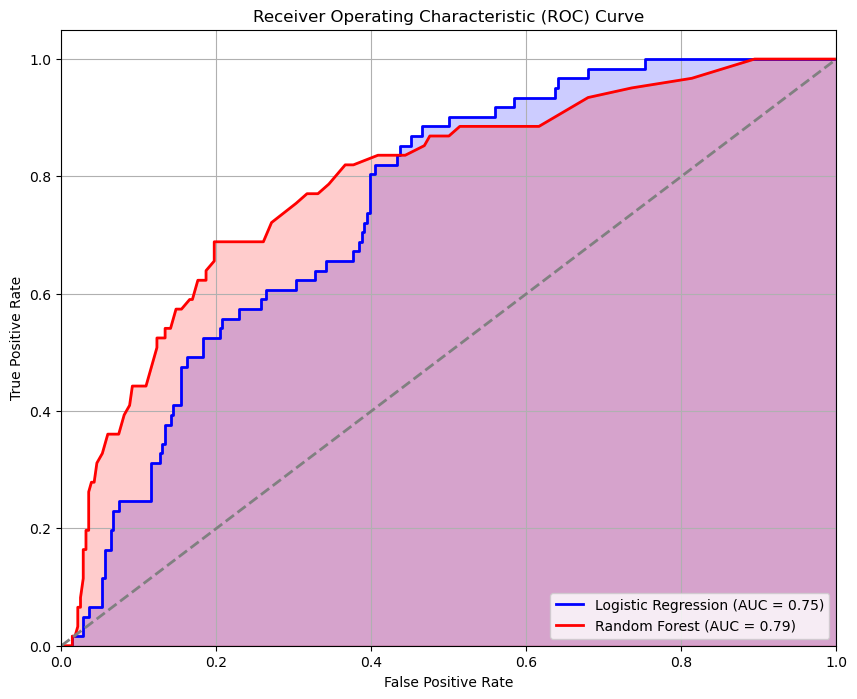

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the probabilities for the positive class
y_pred_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
roc_auc_log = auc(fpr_log, tpr_log)

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.fill_between(fpr_log, tpr_log, color='blue', alpha=0.2)
plt.fill_between(fpr_rf, tpr_rf, color='red', alpha=0.2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Conclusion

This notebook demonstrates a complete machine learning workflow for predicting bank loan defaults,
including data preprocessing, model training, evaluation, and making predictions on new data. 
The use of both Logistic Regression and Random Forest classifiers allows for comparison between different model types.